In [1]:
import numpy as np
import math
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

In [2]:
def plot(data, title=''):
    # plt.scatter(points[:, 0], points[:, 1])
    x = data[:, 0]
    y = data[:, 1]
    plt.plot(x, y)
    plt.title(title)
    plt.show()

In [3]:
def rotation(pt, deg):
    point = pt.copy()
    x = point[0]
    y = point[1]
    rad = math.radians(deg)
    cos = np.cos(rad)
    sin = np.sin(rad)
    x_prime = x * cos - y * sin
    y_prime = x * sin + y * cos
    return [x_prime, y_prime]

def rotate(points, deg):
    arr_point = points.copy()
    center = np.min(arr_point, axis=0) / 2
    for i in range(len(arr_point)):
        arr_point[i] -= center
    for i in range(len(arr_point)):
        arr_point[i] = rotation(arr_point[i], deg)
    for i in range(len(arr_point)):
        arr_point[i] += center
    return arr_point


In [9]:
def count_weight(pts):
    points = pts.copy()
    weight = 0
    for point in points:
        y = point[1]
        weight += y
    return weight

def make_convex(points, reverse = False):
    arr_point = points.copy()
    threshold_weight = None
    final_points = None
    agl = None

    for i in range(360):
        temp_points = rotate(arr_point, i)
        weight = count_weight(temp_points)
        # print(weight)
        if threshold_weight is None:
            threshold_weight = weight
            final_points = temp_points
            agl = i
        elif not reverse and weight > threshold_weight:
            threshold_weight = weight
            final_points = temp_points
            agl = i
        elif reverse and weight < threshold_weight:
            threshold_weight = weight
            final_points = temp_points
            agl = i

    return final_points, agl

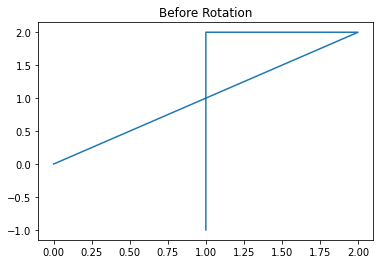

[[-0.3146602  -0.11142702]
 [-0.01900905  2.70150569]
 [-0.79615502  2.07218529]
 [ 1.09180616 -0.25925259]]


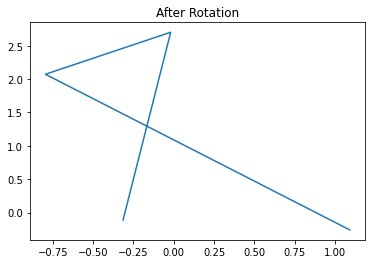

In [11]:
points = np.array([
    [0, 0],
    [2, 2],
    [1, 2],
    [1, -1]
]).astype('float64')

plot(points, 'Before Rotation')

fp, agl = make_convex(points)

print(fp)
plot(fp, 'After Rotation')
